In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
pwd

'/Users/viveksasikumar'

In [20]:
train = pd.read_csv('/Users/viveksasikumar/Downloads/train (1).csv')

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


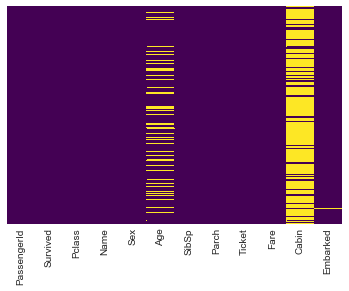

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

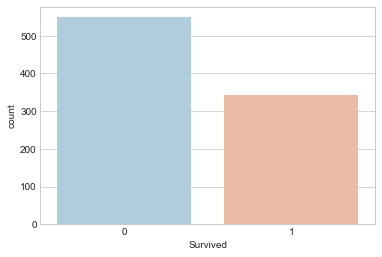

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

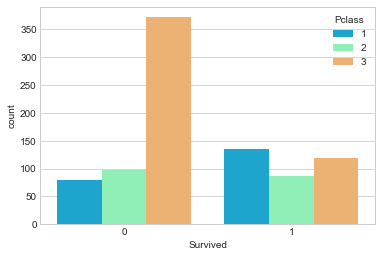

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

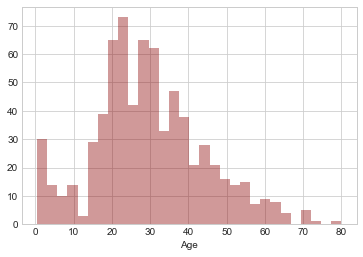

In [25]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

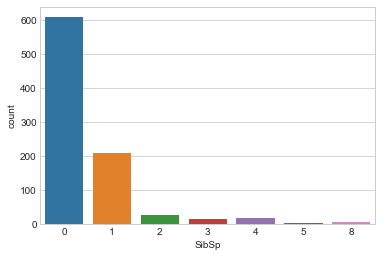

In [26]:
sns.countplot(x='SibSp',data=train)

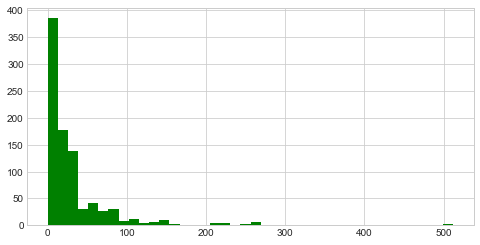

In [27]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

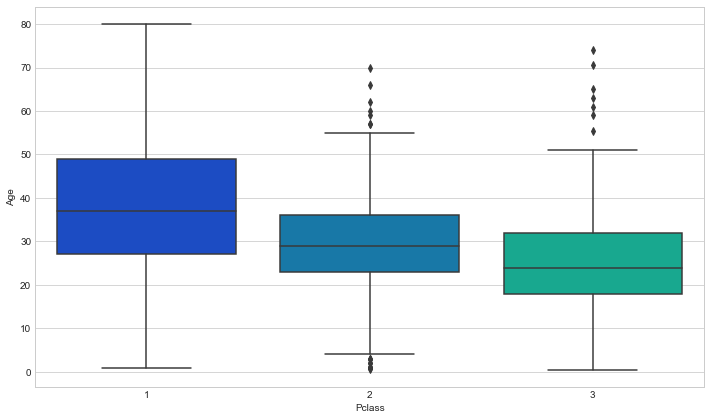

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [29]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [30]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

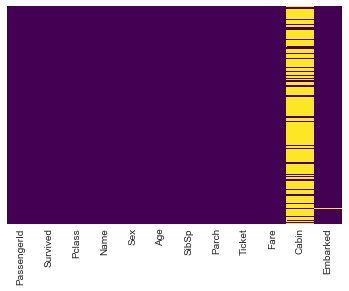

In [31]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)

In [33]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [34]:
import statsmodels.api as sm

/Users/viveksasikumar/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [35]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [36]:
logit = sm.Logit(y, X)
model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.491394
         Iterations 6


In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                            8
Date:                Wed, 14 Feb 2018   Pseudo R-squ.:                  0.2613
Time:                        13:33:54   Log-Likelihood:                -436.85
converged:                       True   LL-Null:                       -591.41
                                        LLR p-value:                 4.713e-62
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
PassengerId     0.0009      0.000      2.919      0.004       0.000       0.002
Pclass         -0.0538      0.090     -0.599      0.549      -0.230       0.122
Age             0.0017      0.006      0.294      0.769      -0.010       0.013
SibSp          -0.2797      0.096     -2.920      0.003      -0.467      -0.092
Parch          -0.1239      0.114     -1.084      0.278      -0.348       0.100
Fare            0.0167      0.003      5.577      0.000       0.011       0.023
male           -2.3358      0.185    -12.636      0.000      -2.698      -1.973
Q               0.2723      0.354      0.769      0.442      -0.422       0.966
S               0.2075      0.222      0.936      0.350      -0.227       0.642
===============================================================================
"""